<center><h1><b><font size="8">Milk Quality Assessment</font></b></h1></center>
<center><h1>Classification Model</h1><center>

# The Dataset

This dataset is manually collected from observations. It helps us to build machine learning models to predict the quality of milk.
This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generally, the Grade or Quality of the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("milknew.csv")

In [3]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [5]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [6]:
dataset["Grade"].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [7]:
dataset.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [8]:
dataset.rename(columns={"Fat ":"Fat"},inplace=True)

In [9]:
from skimpy import skim

In [10]:
skim(dataset)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1059   │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 8      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ pH                  │     0 │        0 │     6.6 │     1.4 │      3 │    6.5 │    6.8 │     9.5 │  ▁▁ █▁▂  │  │
│ │ Temprature          │     0 │        0 │      44 │      10 │     34 │     38 │     45 │      90 │   █▄▁▁   │  │
│ │ Taste               │     0 │        0 │    0.55 │     0.5 │      0 │      0 │      1 │       1 │  ▇    █  │  │
│ │ Odor                │     0 │        0 │    0.43 │     0.5 │      0 │      0 │      1 │       1 │  █    ▆  │  │
│ │ Fat                 │     0 │        0 │    0.67 │    0.47 │      0 │      0 │      1 │       1 │  ▄    █  │  │
│ │ Turbidity           │     0 │        0 │    0.49 │     0.5 │      0 │      0 │      1 │       1 │  █    █  │  │
│ │ Colour              │     0 │        0 │     250 │     4.3 │    240 │    250 │    260 │     260 │    ▃ ▂█  │  │
│ └─────────────────────┴───────┴──────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Grade                     │       0 │          0 │                            1 │                     1100 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

There is no NaN values

__Variabels__

Independent variabels or X:
* pH: ranges from 3.0 to 9.5 max, and an average of 6.63;
* Temprature: defines the temperature of the milk and ranges from 34ºC to 90ºC, with an average of 44.22ºC;
* Taste: defines Taste of the milk which is categorical data 0 (Bad) or 1 (Good);
* Odor: defines the odor of the milk wich is a categorical data where 0 is Bad and 1 is Good;
* Fat: values of milk fat´s. This is also a categorical data, where 0 is Low Fat and 1 High Fat;
* Turbity: it´s also a categorical data that define the turbity of the milk. The values can be 0 for Low turbity and 1 for High turbity.
* Colour: this variabel defines the color of the milk and can have values that ranges from 240 to 255 max, and has an average of 251.8.

Dependent variabel or y:
* Grade: this variabel defines the Grade of the milk wich is a categorical data where Low is bad quality, Medium is moderate quality and High is good quality.

As we can see before our numerical data has diferents ranges so we will have to do some feature scaling.

# 1. Exploratory Data Analysis

In [11]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [12]:
# Let´s organize our independent data (left--categorical data, right--numerical data)
dataset =dataset[["Taste","Odor","Fat","Turbidity","pH","Temprature","Colour","Grade"]]
dataset.head()

,Taste,Odor,Fat,Turbidity,pH,Temprature,Colour,Grade
0,1,0,1,0,6.6,35,254,high
1,0,1,0,1,6.6,36,253,high
2,1,1,1,1,8.5,70,246,low
3,1,1,0,1,9.5,34,255,low
4,0,0,0,0,6.6,37,255,medium


__Grade__

In [13]:
dataset["Grade"].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

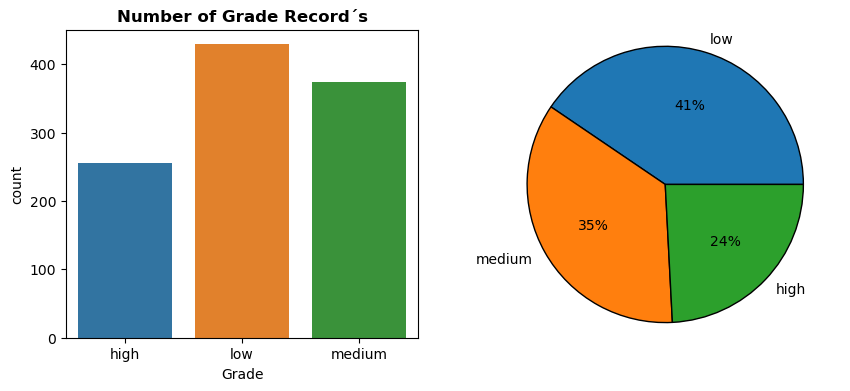

In [15]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x="Grade",data = dataset)
plt.title("Number of Grade Record´s", fontweight="bold")

plt.subplot(1,2,2)
plt.pie(dataset["Grade"].value_counts().values,
       labels=list(dataset["Grade"].value_counts().index),
        wedgeprops = {"ec": "k"},
       textprops = {"fontsize":10},
       autopct="%1.0f%%")
plt.axis("equal")
plt.show()

As we can see we have an imbalanced dataset. Where must of our dependent values are low quality with 429 record´s and high quality has less record´s with 256. Let´s deal with this problem later.

In [16]:
dataset.groupby("Grade").agg(["mean","std"])

Taste                Odor                 Fat           Turbidity  \
            mean       std      mean       std      mean       std      mean   
Grade                                                                          
high    0.664062  0.473242  0.750000  0.433861  0.996094  0.062500  0.632812   
low     0.592075  0.492023  0.477855  0.500093  0.727273  0.445882  0.724942   
medium  0.414439  0.493285  0.163102  0.369953  0.385027  0.487253  0.125668   

                        pH           Temprature                 Colour  \
             std      mean       std       mean        std        mean   
Grade                                                                    
high    0.482982  6.692578  0.108752  40.648438   3.739749  252.539062   
low     0.447065  6.588578  2.194712  50.289044  13.043794  252.734266   
medium  0.331919  6.635027  0.130899  39.721925   3.613751  250.336898   

                  
             std  
Grade             
high    3.711989  
low     3.233046  
medium  5.262430

As we can observe, some variables have slight differences among the grades of milk quality. Odor and Fat are relatively higher in the milk of higher quality, but it's worth taking a closer look later.

## 1.1. Outliers

__Identification__

Just for numerical variabels (pH, Temprature, Colour)

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
def boxplot(column):
    sns.boxplot(dataset["Grade"], dataset[column])
    plt.title("Boxplot of Grade vs" + column)

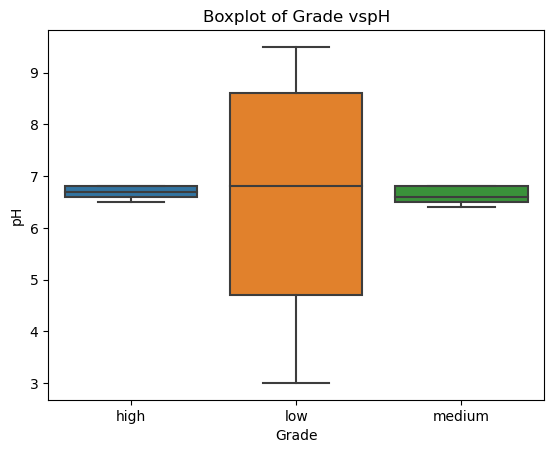

In [19]:
boxplot("pH")

There is no outliers

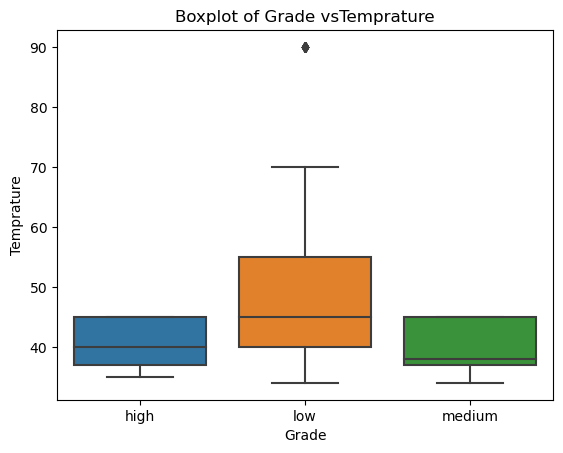

In [20]:
boxplot("Temprature")

There is just one outlier but it´s not relevant

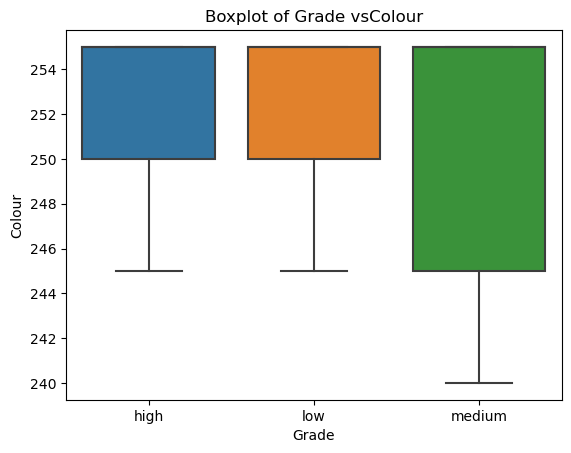

In [21]:
boxplot("Colour")

There is no outliers

## 1.2. Variabels Distribution

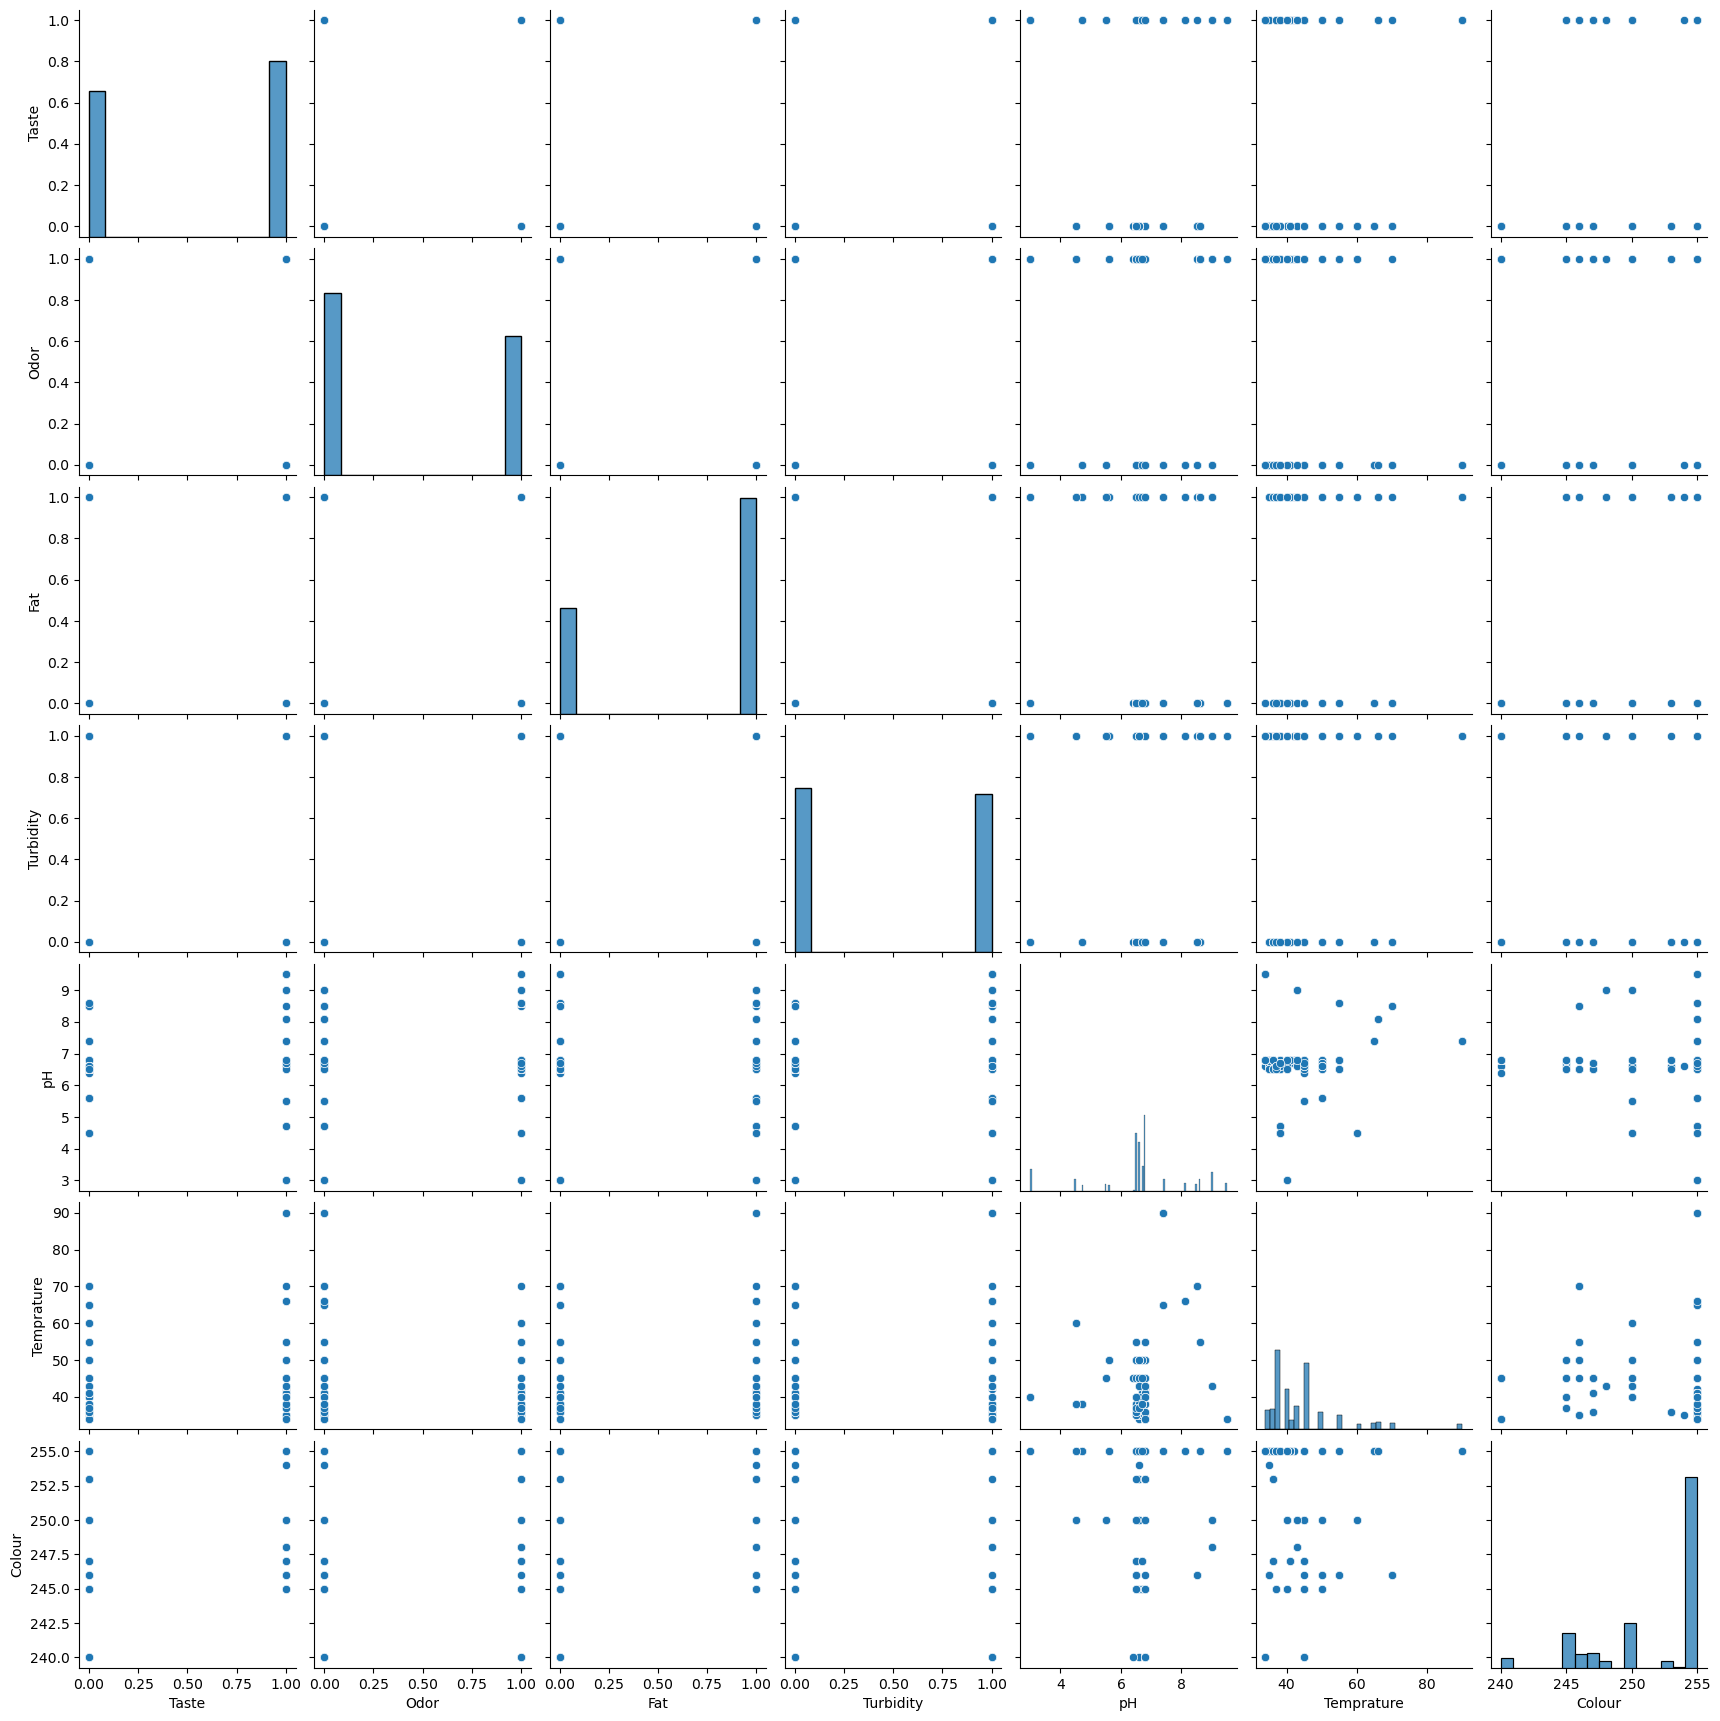

In [22]:
sns.pairplot(dataset)

Considering just the numerical variabels(pH, Temprature and Colour), just the pH apears to have a normal distribution.

__Skewness__

Skewness is a statistical property that measures the degree of asymmetry in a probability distribution. A dataset is considered to be skewed if it is not symmetric, meaning that it is not equally distributed on both sides of its central value. Skewness can be positive or negative, indicating that the tail of the distribution is longer on the right or left side, respectively. The degree of skewness is measured by the skewness coefficient, which is a standardized measure that indicates the degree and direction of skewness. Skewness is an important characteristic of data that can have implications for statistical analysis and modeling.

There are two types of skewness: positive skewness and negative skewness. Positive skewness occurs when the tail of the distribution is longer on the right side, or in other words, there are more high values than low values. Negative skewness occurs when the tail of the distribution is longer on the left side, or in other words, there are more low values than high values.

In [23]:
dataset.skew()

Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
pH           -0.683904
Temprature    2.216739
Colour       -1.024902
dtype: float64

The variable "Temperature" has a very high positive skewness value of 2.216739, indicating that its distribution is very skewed to the right. The variabel "Colour" has also a very high negative skewness value od -1.0249, indicating that its distribution is very skewed to the left.So let´s deal with that by redusing their skewness

_Temperature_

<AxesSubplot:xlabel='Temprature'>

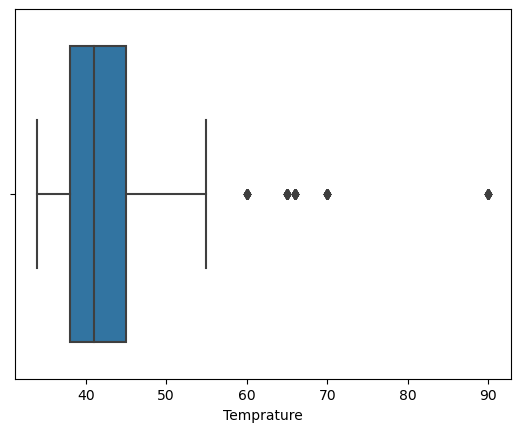

In [24]:
sns.boxplot(dataset["Temprature"])

In [25]:
# Let´s remove this some outliers by applying the IQR Method
column_temprature = ["Temprature"]

for i in column_temprature:
    q3, q1 = np.percentile(dataset[i], [75, 25])
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    dataset.loc[ (dataset[i]>upper_limit) , i] = upper_limit
    dataset.loc[ (dataset[i]<lower_limit), i] = lower_limit

<AxesSubplot:xlabel='Temprature'>

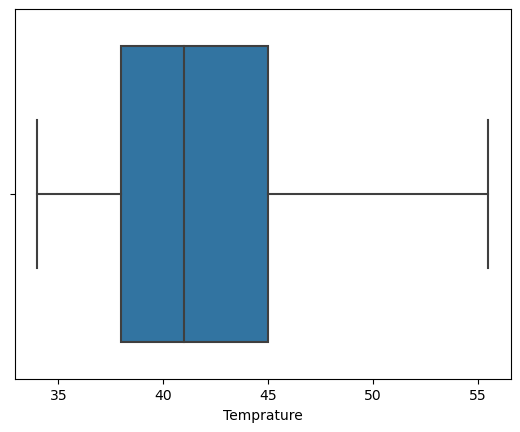

In [26]:
sns.boxplot(dataset["Temprature"])

In [27]:
# Let´s take a look closer to the distribution
def distplot(column):
    sns.distplot(dataset[column])

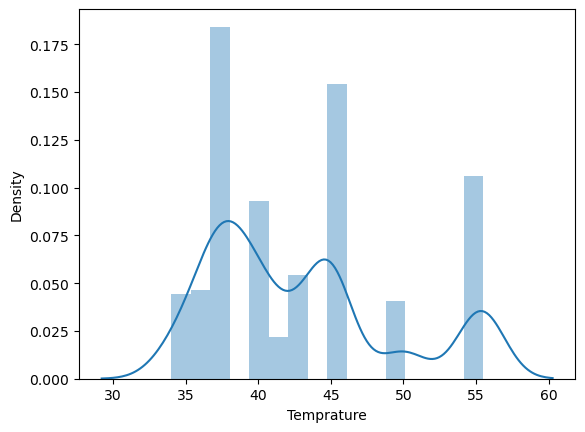

In [28]:
distplot("Temprature")

In [29]:
# Let´s do a transformation by applying the power trnaformation(Box-Cox)
import scipy.stats as stats
dataset["Temprature"], lambda_value = stats.boxcox(dataset["Temprature"])

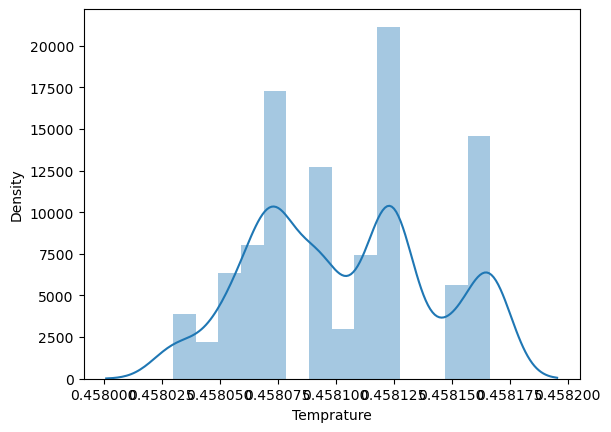

In [30]:
distplot("Temprature")

In [31]:
# Let´s see the skewness value
dataset['Temprature'].skew()

0.10709152968895791

Now it has almost a normal distribution and has a lower skewnes value

_Colour_

<AxesSubplot:xlabel='Colour'>

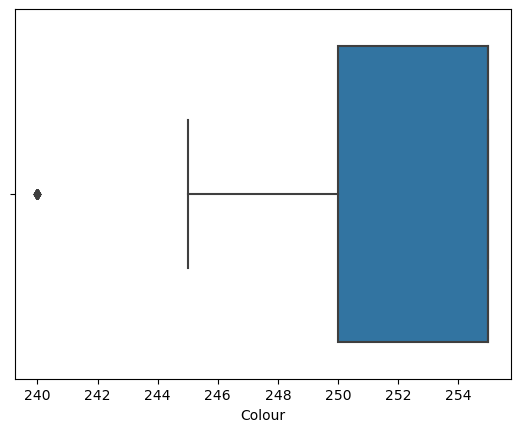

In [32]:
sns.boxplot(dataset["Colour"])

In [33]:
# # Let´s remove this some outliers by applying the IQR Method
column_colour = ["Colour"]

for i in column_colour:
    q3, q1 = np.percentile(dataset[i], [75, 25])
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    dataset.loc[ (dataset[i]>upper_limit) , i] = upper_limit
    dataset.loc[ (dataset[i]<lower_limit), i] = lower_limit

<AxesSubplot:xlabel='Colour'>

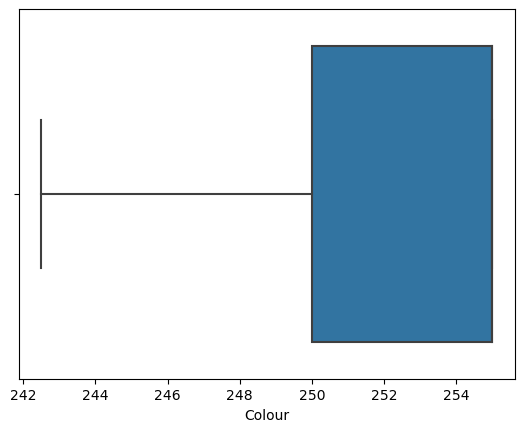

In [34]:
sns.boxplot(dataset["Colour"])

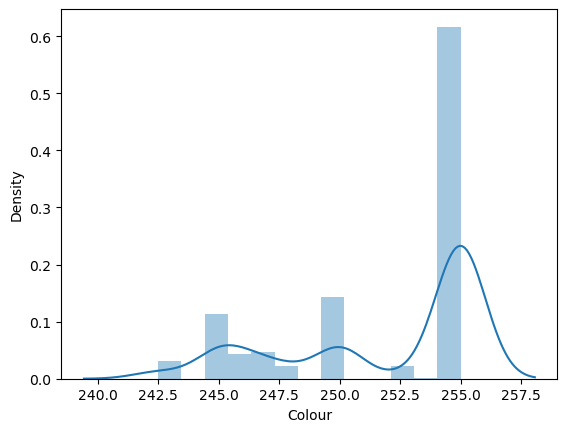

In [35]:
# Let´s take a look closer to the distribution
distplot("Colour")

In [36]:
# Let´s apply a sqrt-transformation
dataset["Colour"] = np.sqrt(dataset["Colour"])

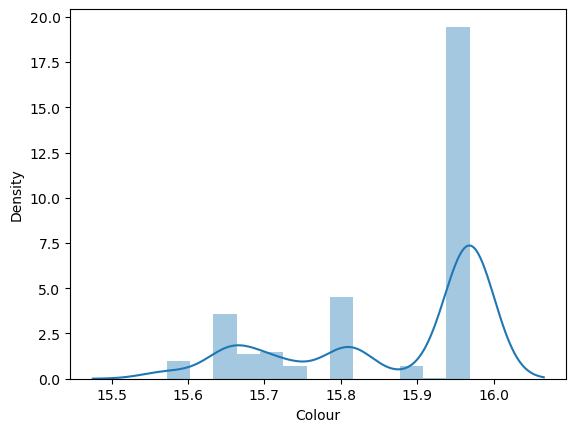

In [37]:
distplot("Colour")

In [38]:
# Let´s see the skewness value
dataset['Colour'].skew()

-0.8676259962227674

It doesn´t still has a normal distribution it it is the best we can do

_pH_

<AxesSubplot:xlabel='pH'>

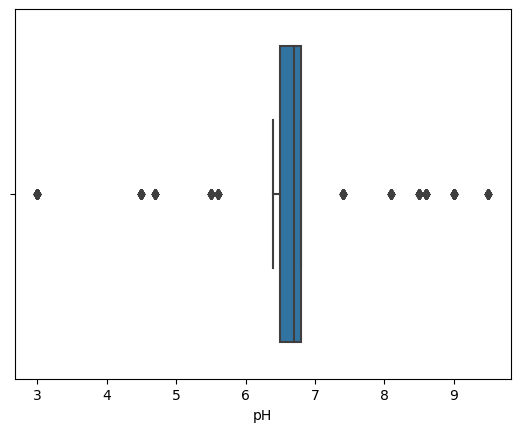

In [39]:
sns.boxplot(dataset["pH"])

In [40]:
# Let´s remove this some outliers by applying the IQR Method
column_pH = ["pH"]

for i in column_pH:
    q3, q1 = np.percentile(dataset[i], [75, 25])
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    dataset.loc[ (dataset[i]>upper_limit) , i] = upper_limit
    dataset.loc[ (dataset[i]<lower_limit), i] = lower_limit

<AxesSubplot:xlabel='pH'>

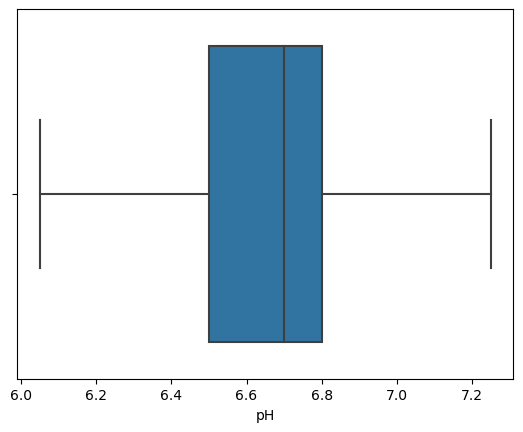

In [41]:
sns.boxplot(dataset["pH"])

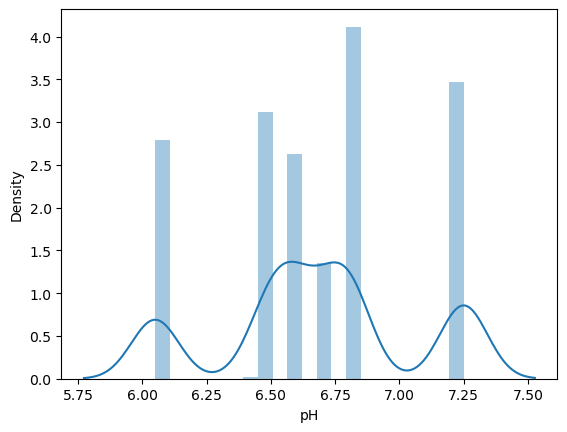

In [42]:
# Let´s take a look closer to the distribution
distplot("pH")

In [43]:
# Let´s apply a log-transformation to see if we have a distribution closer to a normal
dataset["pH"] = np.log(dataset["pH"])

In [44]:
dataset["pH"].skew()

-0.17949849337978083

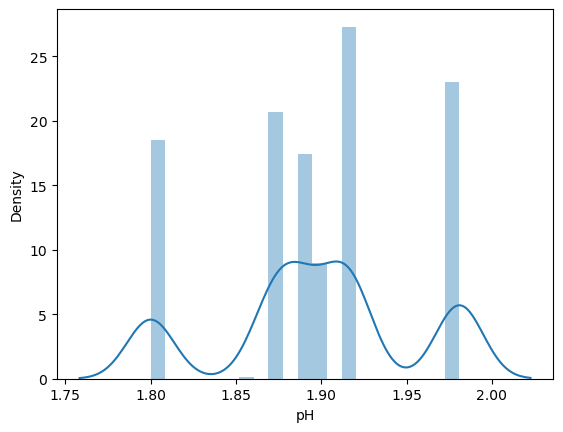

In [45]:
distplot("pH")

Now it has almost a normal distribution and a lower skewnes value

In [46]:
# Let´s take a lokk to all the skweness values
dataset.skew()

Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
pH           -0.179498
Temprature    0.107092
Colour       -0.867626
dtype: float64

# 2. Feature Engineer

## 2.1.Encoding Categorical Data

__Label Encoding__

Let´s apply Label Encoder to our Dependent Variabel (y).
Label Encoder is a preprocessing technique used in machine learning to convert categorical variables into numerical labels, which can be used as input for various machine learning algorithms. It assigns a unique integer to each category in a feature column, allowing the algorithm to understand the relationship between the categories and make more accurate predictions.

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()
dataset["Grade"] = le.fit_transform(dataset["Grade"])
dataset["Grade"].unique()

array([0, 1, 2])

In [49]:
dataset.head()

,Taste,Odor,Fat,Turbidity,pH,Temprature,Colour,Grade
0,1,0,1,0,1.887070,0.458043,15.937377,0
1,0,1,0,1,1.887070,0.458054,15.905974,0
2,1,1,1,1,1.981001,0.458167,15.684387,1
3,1,1,0,1,1.981001,0.458030,15.968719,1
4,0,0,0,0,1.887070,0.458065,15.968719,2


## 2.2. Correlation Between Variabels

<AxesSubplot:>

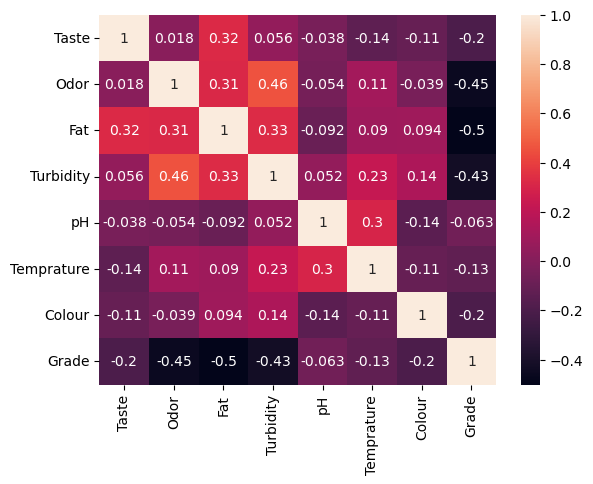

In [50]:
corr = dataset.corr()
sns.heatmap(corr, annot=True)

As we can see by the heatmap none of our variables appear to have a stong correlation with our dependent variabel (Grade). The highest correlation has between the Odor variables. It has negative correlation whith a value of -0.45

## 2.3. Dealing with Imbalanced Data

__SMOTE Method__

In [51]:
#dataset["Grade"].value_counts()

In [52]:
#count_class_0, count_class_1, count_class_2 = dataset["Grade"].value_counts()
#dataset_0 = dataset[dataset["Grade"]==0]
#dataset_1 = dataset[dataset["Grade"]==1]
#dataset_2 = dataset[dataset["Grade"]==2]

In [53]:
#count_class_0, count_class_1, count_class_2

In [54]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [55]:
X

array([[ 1.        ,  0.        ,  1.        , ...,  1.88706965,
         0.45804252, 15.93737745],
       [ 0.        ,  1.        ,  0.        , ...,  1.88706965,
         0.45805419, 15.90597372],
       [ 1.        ,  1.        ,  1.        , ...,  1.98100147,
         0.45816665, 15.68438714],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  1.80005827,
         0.45809199, 15.96871942],
       [ 1.        ,  0.        ,  1.        , ...,  1.91692261,
         0.45811333, 15.8113883 ],
       [ 0.        ,  1.        ,  1.        , ...,  1.98100147,
         0.45816522, 15.96871942]])

In [56]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [57]:
#from imblearn.over_sampling import SMOTE

In [58]:
#smote = SMOTE(sampling_strategy="minority")
#X_sm, y_sm = smote.fit_resample(X,y)

In [59]:
#y_sm.value_counts()

Now our data is almost balanced with a slightly difference

## 2.3. Spliting the Data Set into Training Set and Test Set

In [60]:
#X = X_sm.values
#y = y_sm.values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
print(X_train)

[[ 0.          0.          0.         ...  1.88706965  0.45814835
  15.96871942]
 [ 0.          0.          0.         ...  1.98100147  0.45816665
  15.96871942]
 [ 0.          1.          1.         ...  1.98100147  0.45816522
  15.96871942]
 ...
 [ 0.          0.          0.         ...  1.88706965  0.45814835
  15.8113883 ]
 [ 0.          0.          0.         ...  1.88706965  0.45812512
  15.8113883 ]
 [ 1.          1.          1.         ...  1.91692261  0.45812512
  15.65247584]]


In [63]:
print(X_test)

[[ 1.          0.          1.         ...  1.90210753  0.45807467
  15.96871942]
 [ 1.          0.          1.         ...  1.87180218  0.45807467
  15.96871942]
 [ 0.          0.          0.         ...  1.88706965  0.45807467
  15.96871942]
 ...
 [ 1.          0.          1.         ...  1.98100147  0.45816665
  15.96871942]
 [ 0.          0.          1.         ...  1.87180218  0.45809199
  15.8113883 ]
 [ 1.          0.          1.         ...  1.98100147  0.45811333
  15.8113883 ]]


In [64]:
print(y_train)

[1 1 1 1 1 1 1 2 0 0 2 1 2 0 2 1 1 2 0 0 2 1 1 1 1 1 2 2 0 2 2 0 2 2 2 2 2
 1 0 0 2 1 0 1 2 1 1 0 1 2 2 1 2 1 1 1 1 2 1 1 2 2 1 1 2 0 1 1 0 2 2 1 2 0
 2 1 2 1 1 0 0 1 2 2 1 2 2 1 2 0 1 2 2 1 0 2 0 1 2 0 2 1 1 2 1 2 1 1 1 1 1
 0 1 1 1 1 2 2 2 0 1 2 2 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 2 1 2 1 0 0 0 1 2
 2 2 2 1 0 0 0 1 1 0 2 0 2 0 2 2 2 2 1 1 1 2 1 2 1 1 2 2 2 1 2 2 1 2 1 1 2
 1 0 0 0 0 0 1 2 2 0 2 1 2 1 0 1 2 2 1 1 0 1 2 2 2 2 0 2 1 2 2 0 2 2 1 1 0
 0 1 2 2 1 2 0 1 0 0 0 0 2 2 1 0 2 2 2 1 1 1 0 1 1 0 0 1 0 1 1 0 2 0 1 1 2
 2 0 2 1 2 2 1 1 1 2 0 2 1 2 1 1 1 1 2 1 0 2 0 0 2 1 2 2 0 2 1 2 2 1 1 1 1
 1 1 2 1 2 1 1 0 1 1 2 1 2 2 2 1 0 2 1 1 2 0 2 1 0 0 2 2 0 0 2 2 2 2 2 2 0
 2 0 2 1 1 1 2 0 2 1 2 1 1 0 2 2 0 1 2 1 0 0 1 1 2 2 0 2 0 1 2 2 1 1 2 0 2
 0 2 1 2 1 2 1 1 1 0 0 1 1 2 0 1 1 0 0 1 1 2 2 1 0 1 1 0 1 0 1 1 2 2 0 2 1
 1 0 1 1 1 2 1 2 2 2 0 2 0 0 0 0 0 2 1 2 1 0 0 2 0 0 2 1 0 1 0 2 0 1 1 2 1
 1 1 2 1 2 0 0 1 2 1 1 2 0 0 2 2 2 1 1 1 0 1 2 1 0 1 2 1 2 2 0 1 1 0 0 2 0
 2 2 1 2 2 1 2 1 0 2 0 1 

In [65]:
print(y_test)

[0 2 2 0 2 0 2 1 1 1 1 1 2 1 2 0 1 0 1 2 2 1 0 1 2 0 2 1 0 0 2 0 1 0 0 1 1
 0 0 1 0 1 2 2 0 0 2 2 1 1 1 1 1 2 1 2 2 0 2 2 0 1 1 1 1 0 2 1 1 2 2 2 2 1
 0 2 2 2 1 1 2 1 2 0 1 1 0 1 2 0 2 2 1 0 2 2 1 2 0 2 1 1 0 1 1 0 1 2 0 0 1
 1 2 2 0 1 0 2 1 0 2 2 2 1 2 0 2 2 0 1 2 0 1 1 0 1 1 2 1 1 2 2 0 0 0 0 2 2
 1 0 1 2 0 1 2 2 2 0 1 0 1 2 1 1 2 2 2 1 1 2 1 2 2 0 1 1 2 1 1 1 2 2 2 1 1
 0 1 1 2 2 2 2 1 1 0 0 1 2 1 1 1 2 2 2 0 0 0 1 1 1 2 1]


## 2.3. Feature Scaling

Let´s just apply feature scaling for the numerical data(pH, Temprature and Colour).

In [66]:
dataset.head()

,Taste,Odor,Fat,Turbidity,pH,Temprature,Colour,Grade
0,1,0,1,0,1.887070,0.458043,15.937377,0
1,0,1,0,1,1.887070,0.458054,15.905974,0
2,1,1,1,1,1.981001,0.458167,15.684387,1
3,1,1,0,1,1.981001,0.458030,15.968719,1
4,0,0,0,0,1.887070,0.458065,15.968719,2


In [67]:
print(X_train)

[[ 0.          0.          0.         ...  1.88706965  0.45814835
  15.96871942]
 [ 0.          0.          0.         ...  1.98100147  0.45816665
  15.96871942]
 [ 0.          1.          1.         ...  1.98100147  0.45816522
  15.96871942]
 ...
 [ 0.          0.          0.         ...  1.88706965  0.45814835
  15.8113883 ]
 [ 0.          0.          0.         ...  1.88706965  0.45812512
  15.8113883 ]
 [ 1.          1.          1.         ...  1.91692261  0.45812512
  15.65247584]]


__Standardization__

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc =StandardScaler()

In [70]:
X_train[:, 4:] = sc.fit_transform(X_train[:, 4:])
X_test[:, 4:] = sc.transform(X_test[:, 4:])

In [71]:
print(X_train)

[[ 0.          0.          0.         ... -0.21332394  1.14977982
   0.76792867]
 [ 0.          0.          0.         ...  1.45959871  1.62506764
   0.76792867]
 [ 0.          1.          1.         ...  1.45959871  1.58800238
   0.76792867]
 ...
 [ 0.          0.          0.         ... -0.21332394  1.14977982
  -0.44015682]
 [ 0.          0.          0.         ... -0.21332394  0.5465266
  -0.44015682]
 [ 1.          1.          1.         ...  0.31835636  0.5465266
  -1.66038478]]


In [72]:
print(X_test)

[[ 1.          0.          1.         ...  0.05450017 -0.76403557
   0.76792867]
 [ 1.          0.          1.         ... -0.48523712 -0.76403557
   0.76792867]
 [ 0.          0.          0.         ... -0.21332394 -0.76403557
   0.76792867]
 ...
 [ 1.          0.          1.         ...  1.45959871  1.62506764
   0.76792867]
 [ 0.          0.          1.         ... -0.48523712 -0.31423943
  -0.44015682]
 [ 1.          0.          1.         ...  1.45959871  0.24021261
  -0.44015682]]


# 3. Machine Learning

In this case we are going to buil classification model´s.

Classification machine learning models are used to predict the class or category of a given observation based on its features or attributes. The goal of a classification model is to build a function that can take input data and output the class that the data belongs to. There are several types of classification models, including:

Logistic Regression: A statistical method that uses a logistic function to model a binary dependent variable.

Decision Trees: A model that uses a tree-like structure to represent the relationships between features and class labels.

Random Forest: An ensemble model that combines multiple decision trees to improve accuracy.

Naive Bayes: A probabilistic model that makes predictions based on the likelihood of each class given the input data.

Support Vector Machines (SVM): A model that finds the best boundary (hyperplane) that separates the classes.

K-Nearest Neighbors (KNN): A model that classifies new observations based on the closest k training examples in the feature space.

## 3.1. Model Building

#### 3.1.1. Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [75]:
# Predicting the Test set Results
y_pred_logistic = logistic.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_logistic.reshape(len(y_pred_logistic),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [2 2]
 [2 2]
 [1 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 1]
 [0 0]
 [0 0]
 [2 1]
 [1 1]
 [0 0]
 [1 0]
 [2 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [0 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 2]
 [2 2]
 [1 1]
 [0 1]
 [2 2]
 [2 1]
 [2 2]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [1 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [2 2]
 [1 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 2]
 [1 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]

In [76]:
# Making the Confusion Matrix and See Some Metrics
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        52
           1       0.81      0.77      0.79        83
           2       0.86      0.86      0.86        77

    accuracy                           0.83       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.83      0.83      0.83       212



Text(0.5, 23.52222222222222, 'Predicted label')

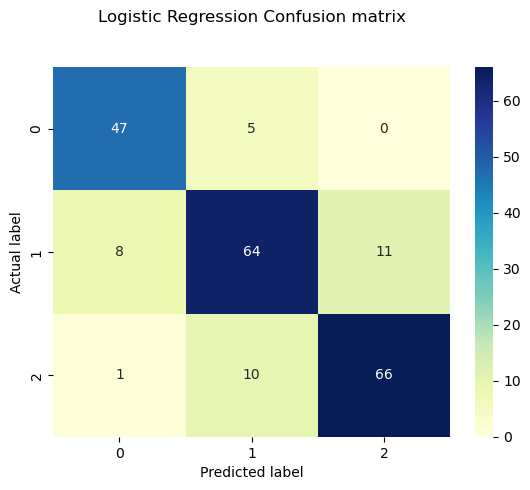

In [78]:
cm = confusion_matrix(y_test,y_pred_logistic)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The model appears to have some struggles to identify the class 1

In [79]:
# K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_logistic = cross_val_score(estimator = logistic, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Accuracy: {:.2f} %".format(accuracies_logistic.mean() * 100))
print("Logistic Regression Standard Deviation: {:.2f} %".format(accuracies_logistic.std() * 100))

Logistic Regression Accuracy: 78.04 %
Logistic Regression Standard Deviation: 5.05 %


__Hyperparameter Tunning__

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
# create logistic regression model
lr = LogisticRegression()

# define hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000]
}

# define grid search with 5-fold cross-validation
grid = GridSearchCV(lr, param_grid, cv=5, verbose=1, n_jobs=-1)

# fit grid search to the data
grid.fit(X_train, y_train)

# print best hyperparameters and accuracy score
print("Best hyperparameters: ", grid.best_params_)
print("Best accuracy score: ", grid.best_score_)


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best hyperparameters:  {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
Best accuracy score:  0.7851374869474418


### 3.1.2. K-NN (K-Nearest Neighbors)

In [82]:
from sklearn.neighbors import KNeighborsClassifier 

In [83]:
knn = KNeighborsClassifier(n_neighbors=5, metric = "minkowski", p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
# Predicting the Test set Results
y_pred_knn = knn.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [0 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]

In [85]:
# Making the Confusion Matrix and See Some Metrics
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      1.00      1.00        83
           2       1.00      0.97      0.99        77

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



The model appears to be overfit

This looks like a perfect classification result. However, it is important to note that achieving 100% precision, recall, and F1-score in a classification problem is quite rare and could indicate overfitting. Therefore, it is essential to evaluate the model on unseen data using techniques like K-fold cross-validation to ensure the model's performance generalizes well to new data.

Text(0.5, 23.52222222222222, 'Predicted label')

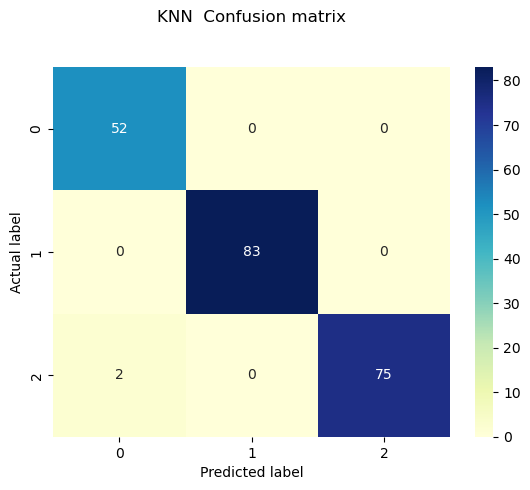

In [86]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
p = sns.heatmap(pd.DataFrame(cm_knn), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('KNN  Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [87]:
# K-Fold Cross Validation
accuracies_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print("KNN Accuracy: {:.2f} %".format(accuracies_knn.mean() * 100))
print("KNN Standard Deviation: {:.2f} %".format(accuracies_knn.std() * 100))

KNN Accuracy: 99.41 %
KNN Standard Deviation: 0.80 %


In [88]:
# define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

# create a KNN model
knn = KNeighborsClassifier()

# create a GridSearchCV object
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# print the best hyperparameters and best accuracy score
print('Best hyperparameters: ', grid.best_params_)
print('Best accuracy score: ', grid.best_score_)

Best hyperparameters:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best accuracy score:  0.9988165680473372


### 3.1.3. SVM (Support Vector Machine)

In [89]:
from sklearn.svm import SVC

In [90]:
svm = SVC(kernel="linear")
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [91]:
# Predicitng the Test set Results
y_pred_svm = svm.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [2 2]
 [2 2]
 [1 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [2 1]
 [0 0]
 [0 0]
 [2 1]
 [1 1]
 [0 0]
 [1 0]
 [2 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [2 2]
 [0 1]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 1]
 [2 2]
 [2 1]
 [2 2]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [1 2]
 [2 0]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [2 1]
 [2 1]
 [2 2]
 [1 2]
 [0 0]
 [2 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]

In [92]:
# Making the Confusion Matrix and See Some Metrics
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        52
           1       0.84      0.69      0.75        83
           2       0.75      0.91      0.82        77

    accuracy                           0.80       212
   macro avg       0.81      0.81      0.80       212
weighted avg       0.81      0.80      0.80       212



Text(0.5, 23.52222222222222, 'Predicted label')

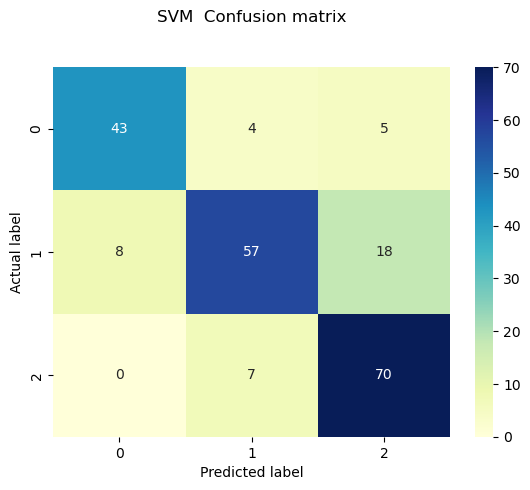

In [93]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
p = sns.heatmap(pd.DataFrame(cm_svm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('SVM  Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
# K-Fold Cross Validation
accuracies_svm = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: {:.2f} %".format(accuracies_svm.mean() * 100))
print("SVM Standard Deviation: {:.2f} %".format(accuracies_svm.std() * 100))

SVM Accuracy: 80.29 %
SVM Standard Deviation: 5.09 %


In [95]:
# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 'scale'], 
              'kernel': ['linear', 'rbf', 'poly']}

# Create an SVM object
svm = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the best accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy score:  0.9976331360946744


### 3.1.4. Kernel SVM

In [96]:
kernel = SVC(kernel = "rbf")
kernel.fit(X_train,y_train)

SVC()

In [97]:
# Predicitng the Test set Results
y_pred_kernel = kernel.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_kernel.reshape(len(y_pred_kernel),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [2 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [2 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [2 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]

In [98]:
print(classification_report(y_test,y_pred_kernel))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       1.00      0.99      0.99        83
           2       0.95      1.00      0.97        77

    accuracy                           0.98       212
   macro avg       0.98      0.97      0.97       212
weighted avg       0.98      0.98      0.98       212



Text(0.5, 23.52222222222222, 'Predicted label')

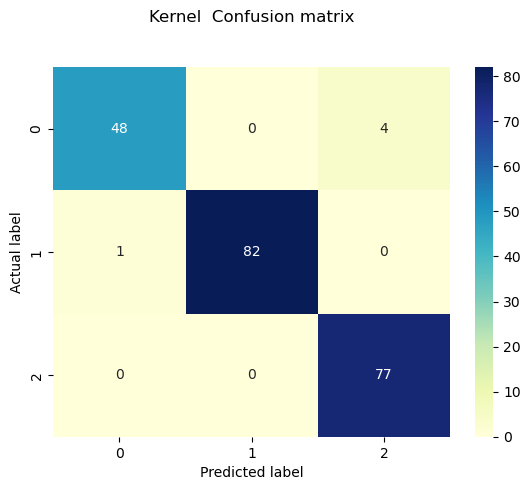

In [99]:
cm_kernel = confusion_matrix(y_test,y_pred_kernel)
p = sns.heatmap(pd.DataFrame(cm_kernel), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Kernel  Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [100]:
# K-Fold Cross Validation
accuracies_kernel_SVM = cross_val_score(estimator = kernel, X = X_train, y = y_train, cv = 10)
print("Kernel SVM Accuracy: {:.2f} %".format(accuracies_kernel_SVM.mean() * 100))
print("Kernel SVM Standard Deviation: {:.2f} %".format(accuracies_kernel_SVM.std() * 100))

Kernel SVM Accuracy: 97.17 %
Kernel SVM Standard Deviation: 1.76 %


### 3.1.5. Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [103]:
# Predicitng the Test set Results
y_pred_NB = NB.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_NB.reshape(len(y_pred_NB),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 2]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [1 2]
 [0 0]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [0 0]
 [2 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 2]
 [0 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]

In [104]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        52
           1       0.91      0.88      0.90        83
           2       0.90      0.83      0.86        77

    accuracy                           0.89       212
   macro avg       0.89      0.90      0.89       212
weighted avg       0.89      0.89      0.89       212



Text(0.5, 23.52222222222222, 'Predicted label')

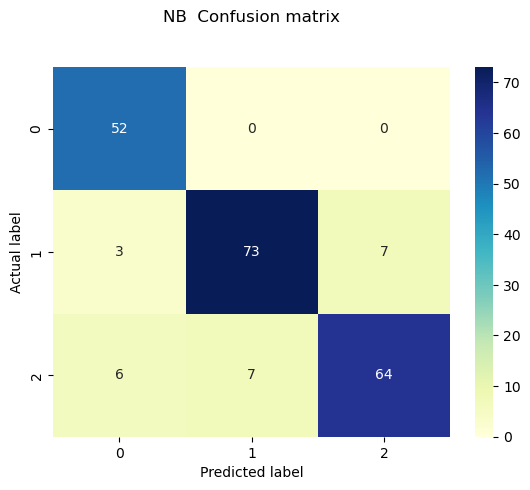

In [105]:
cm_NB = confusion_matrix(y_test,y_pred_NB)
p = sns.heatmap(pd.DataFrame(cm_NB), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('NB  Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [106]:
# K-Fold Cross Validation
accuracies_NB = cross_val_score(estimator = NB, X = X_train, y = y_train, cv = 10)
print("NB Accuracy: {:.2f} %".format(accuracies_NB.mean() * 100))
print("NB Standard Deviation: {:.2f} %".format(accuracies_NB.std() * 100))

NB Accuracy: 89.02 %
NB Standard Deviation: 4.41 %


__Hyperparameter Tunning__

In [107]:
# Define the model
NB = GaussianNB()

# Define the hyperparameters to tune
param_grid = {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6]}

# Define the search
search = GridSearchCV(NB, param_grid, cv=5, scoring='accuracy')

# Fit the search to the data
search.fit(X, y)

# Print the best hyperparameters and best accuracy score
print('Best hyperparameters: ', search.best_params_)
print('Best accuracy score: ', search.best_score_)

Best hyperparameters:  {'var_smoothing': 1e-07}
Best accuracy score:  0.8942725565590628


### 3.1.6.Decision Trees

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
tree = DecisionTreeClassifier(criterion="entropy")
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [110]:
# Predicting the Test Set Results
y_pred_tree = tree.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_tree.reshape(len(y_pred_tree),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]

In [111]:
# Making The Confusion Matrix and See Some Metrics
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        77

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



Text(0.5, 23.52222222222222, 'Predicted label')

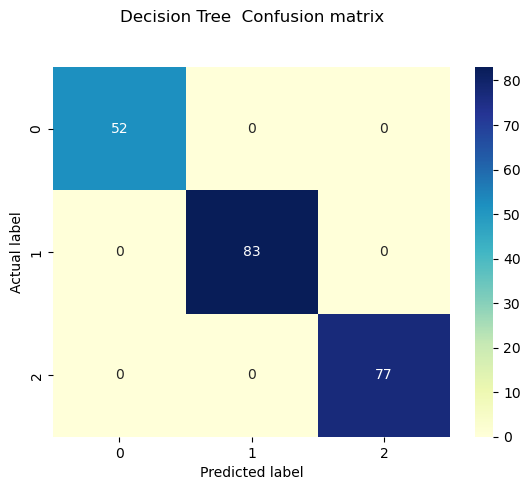

In [112]:
cm_tree = confusion_matrix(y_test,y_pred_tree)
p = sns.heatmap(pd.DataFrame(cm_tree), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Decision Tree  Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [113]:
# K-Fold Cross Validation
accuracies_tree = cross_val_score(estimator = tree, X = X_train, y = y_train, cv = 10)
print("Decision Tree Accuracy: {:.2f} %".format(accuracies_tree.mean() * 100))
print("Decison Tree Standard Deviation: {:.2f} %".format(accuracies_tree.std() * 100))

Decision Tree Accuracy: 99.29 %
Decison Tree Standard Deviation: 0.58 %


### 3.1.7. Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
forest = RandomForestClassifier(n_estimators=100, criterion = "entropy")
forest.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [116]:
# Predicting the Test Set Results
y_pred_forest = forest.predict(X_test)
np.set_printoptions()
print(np.concatenate((y_pred_forest.reshape(len(y_pred_forest),1), y_test.reshape(len(y_test),1)), axis=1))

[[0 0]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [0 0]

In [117]:
# Making The Confusion Matrix and See Some Metrics
print(classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        77

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



Text(0.5, 23.52222222222222, 'Predicted label')

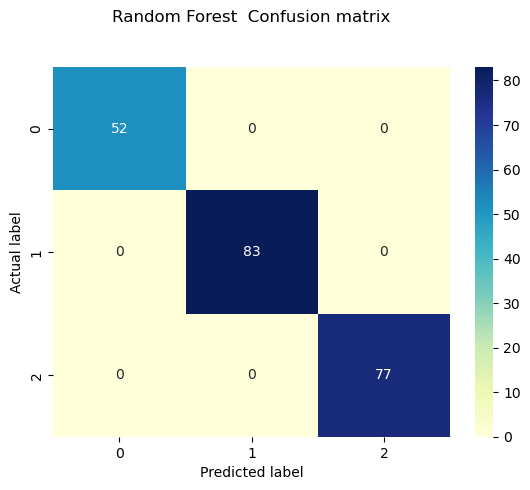

In [118]:
cm_forest = confusion_matrix(y_test,y_pred_forest)
p = sns.heatmap(pd.DataFrame(cm_forest), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Random Forest  Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [119]:
# K-Fold Cross Validation
accuracies_forest = cross_val_score(estimator = forest, X = X_train, y = y_train, cv = 10)
print("Random Forest Accuracy: {:.2f} %".format(accuracies_forest.mean() * 100))
print("Random Forest Standard Deviation: {:.2f} %".format(accuracies_forest.std() * 100))

Random Forest Accuracy: 99.76 %
Random Forest Standard Deviation: 0.47 %


__Hyperparameter Tunning__

In [120]:
# Create a random forest model
rf_model = RandomForestClassifier()

In [121]:
# Define the hyperparameters to tune
params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"],
    "bootstrap": [True, False]
}

In [122]:
# Define the grid search object
grid_search = GridSearchCV(estimator=rf_model, param_grid=params, cv=5)

In [123]:
# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [124]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best hyperparameters:  {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy score:  0.9988165680473372


In [125]:
from sklearn.model_selection import validation_curve

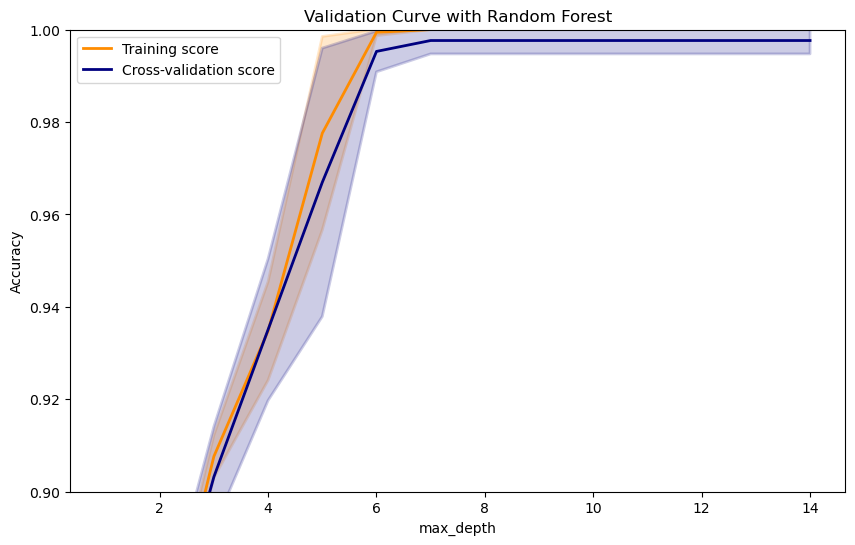

In [126]:
# Define the range of values to test for max_depth hyperparameter
param_range = np.arange(1, 15)

# Create the random forest classifier
rf = RandomForestClassifier(n_estimators=100, max_features='auto', bootstrap=True, 
                             min_samples_leaf=1, min_samples_split=2)

# Calculate training and test scores for different values of max_depth
train_scores, test_scores = validation_curve(rf, X_train, y_train, 
                                             param_name="max_depth", 
                                             param_range=param_range,
                                             cv=5, scoring="accuracy")

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Random Forest")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
lw = 2
plt.plot(param_range, train_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2,
                     color="darkorange", lw=lw)
plt.plot(param_range, test_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2,
                     color="navy", lw=lw)
plt.legend(loc="best")
plt.show()